<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b><center><font size="6">Cours - Econométrie en finance - Séance 9</font></center></b>
    
<g><h7><center> CM - P. Durand  - pierre.durand@u-pec.fr </center></h7></g>

<g><h7><center> TD - A. Birem  - abderraouf.birem@etu.u-pec.fr </center></h7></g>


<b><center><font size="5">M1 - 2024-2025</font></center></b> 



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">


 


<br>
<b>Plan du cours : </b>

- Séance 1 – Introduction générale & Introduction avancée à Python
- Séance 2 – Rappels économétriques et bases de données sous python
- Séance 3 – Modèle de régression simple
- Séance 4 - Modèle de régression multiple
- Séance 5 – Violation des hypothèses (1)
- Séance 6 – Violation des hypothèses (2)
- Séance 7 – Caractéristiques des séries temporelles
- Séance 8 – Stationnarité et conséquences, tests de racine unitaire
- <b>Séance 9 – Modélisation en série temporelles : ARMA-ARCH</b>
- Séance 10 - Modèles VAR et correction d'erreur
- Séance 11 – Introduction aux modèles de classification : logit



<b>Références en Econométrie</b> :

- Pesaran, M. H. (2015). Time series and panel data econometrics. Oxford University Press.

- Bourbonnais, R. (2008), Econométrie, Dunod, 7e édition.

- Mignon, V. (2008), Econométrie : Théorie et applications.

- Lardic, S. & Mignon, V. (2002), Econométrie des séries temporelles macroéconomiques et financières.


<b>Références pour la finance</b>  :

-	Finance de marché (Portait – Poncet)
-	Recent advances in linear models and related areas (Shalabh – Heumann)

<b>Références pour python</b>  :

- Presque tout est gratuit et en open source sur internet
- Liste non exhaustive de livres : <a href="https://python.developpez.com/livres/"> python.developper</a>



<br>
<hr style=" border: .5px solid black;">

<a id='plan'></a>
<br>
<b>Séance 9 : </b>
    
    
    
    
- [Introduction](#p0)

- [1. Les modèles ARMA](#p1)
    - [1.1 Généralités : Modèles de la classe AR(I)MA](#p1.1)
    - [1.2 Modèle MA(q)](#p1.2)
    - [1.3 Modèle AR(p)](#p1.3)
    - [1.4 Modèle ARMA(p,q)](#p1.4)
    - [1.5 La méthodologie de Box et Jenkins](#p1.5)
- [2. Modèles de la classe ARCH](#2)
    - [Faits stylisés](#2.0)
    - [2.1. Modèles ARCH / GARCH](#p2.1)
    - [2.2. Modèles alternatifs](#p2.2)   
    - [2.3 Tests](#p2.3)
    - [2.4 Estimation](#p2.4)
 
    



</span>

In [71]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [72]:
# """Importation des packages utiles"""

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss, acf, acovf, pacf
import datetime as dt

from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tools.eval_measures import rmse, meanabs

import seaborn as sns
from statsmodels.stats.diagnostic import het_arch

In [73]:
"""Fonction permettant la création d'une série de graphiques utiles à l'analyse de séries temporelles"""
"""Empruntée a http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016"""
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">


# Introduction <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p0'></a>
    
    
 
<br>

- Séries-temporelles
- Introduction de modèles dynamique (ARDL notamment)
- Etude de la stationnarité en série temporelle :
    - stationnarité faible / au second ordre (moyenne constante et variance finie)
    - visualisation graphique : autocorrélation et autocorrélation partielle
    - caractérisée par les processus TS et DS
    - caractérisée par saisonnalité
    - testée par les tests ADF
    
    
<br>
    
- Comment utiliser ces outils dans le cadre d'une estimation ? 
    
<br>
    
- Quel type d'estimation ici ? 
    - modélisation dynamiques
    - modélisation athéorique / analyse chartiste (faire de la prévision)
    - modélisation avec objectif de prédiction
    
    
    
    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">


# Les modèles ARMA <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1'></a>
    
    
    
<br>

    
    
## Généralités : Modèles de la classe AR(I)MA <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.1'></a>
    
<br>
    
- Les processus ARMA ont été introduit par Box et Jenkins en 1970.
    
    
<br>

- On parle de processus a-théoriques : non fondé théoriquement.

    
- Modélisation : valeurs passées de la série et des valeurs présentes et passées du terme d'erreur/bruit.

<br>
    
- Définition des processus AR, MA et ARMA avant de décrire la méthodologie de Box-Jenkins en 4 étapes.  
    
    
    
    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">
 
    
<br>

    
    
## Modèle MA(q) <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.2'></a>
    

    
Un processus MA (Moving average) est un processus stationnaire vérifiant une relation du type: 

$$Y_t = \epsilon_t - \theta_1\epsilon_{t-1} - ... - \theta_q\epsilon_{t-q}$$ avec $\theta_i \in {\Bbb R}$ et $\epsilon_t ~ BB(0, \sigma^2_{\epsilon})$

pouvant être réécrit :

$$ Y_t = \Theta(L)\epsilon_t$$ avec $\Theta(L) = 1 - \theta_1 L - ... - \theta_q L^q$ et $L^q$ l'opérateur retard à l'ordre $q$.

La fonction d'autocorélation théorique est donnée par : 
$$
\rho_h = \left\{
    \begin{array}{ll}
        \frac{-\theta_h + \theta_1 \theta_{h+1} + ... + \theta_{q-h}\theta_{q}}{1+\theta^2_1 + ... + \theta^2_q} & \mbox{si } 1 \leq h \leq q \\
        0 & \mbox{sinon.}
    \end{array}
\right.
$$

- La fonction d'autocorr. théorique permet l'identification de l'ordre $q$ du processus __MA__. 
- Elle s'annule pour tout $h > q$. 
- Etant donné que nous disposons d'un échantillon, nous utiliserons la fonction d'autoccorélation empirique pour vérifier cette propriété. 
- Si le vrai proc générateur de donnée est __MA__ alors nous devrions observer que les autocorr a un ordre $h > q$ s'annulent à cet horizon (utiliser test de significativité).

<br>
    
    
La fonction d'autocorr empirique est donnée par:

$$ \hat{\rho}_h = \frac{\sum_{t=1}^{T-h}(Y_t - \bar{Y})(Y_{t+h} - \bar{Y})}{\sum_{t=1}^{T}(Y_t - \bar{Y})^2} $$

Pour tester la significativité (différent de zéro) de ces coefficients on utilise un test de student : 

$$ t_{\hat{\rho}_h} = \frac{\hat{\rho}_h}{\hat{\sigma}(\hat{\rho}_h)} $$ 

avec $$ \hat{\sigma}(\hat{\rho}_h) = \left[ \frac{1}{T} \left( 1+2\sum_{i=1}^{h-1} \hat{\rho}_i^2 \right) \right]^{1/2}$$ 

 
    
    
    
    
</span>

In [74]:
# simulation d'un proc MA(5)

n = 1000
# Fixation des phis à zeros (supprimer la partie AR)
phis = np.array([0., 0., 0., 0., 0.])
thetas = np.array([0.6, 0.3, 0.1, 0.05, 0.02])

# add zero-lag and negate alphas
ar = np.r_[1, phis]
ma = np.r_[1, thetas]

ma5 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ma5, lags=20)

""" On constate que la fonction d'autoccorélation s'annule (ou les coefficients ne sont plus significatifs) 
    au 5ème coefficient """

" On constate que la fonction d'autoccorélation s'annule (ou les coefficients ne sont plus significatifs) \n    au 5ème coefficient "

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">
 
    
<br>

    
    
## Modèle AR(p) <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.3'></a>
    


Un processus AR (Auto Regressif) est un processus stationnaire vérifiant une relation du type : 

$$ Y_t - \phi_1 Y_{t-1} - ... - \phi_p Y_{t-p}= \epsilon_t$$
    
ou encore :
    
$$ Y_t = \phi_1 Y_{t-1} + ... + \phi_p Y_{t-p} + \epsilon_t$$   

ou de façon équivalente : 

$$ \Phi(L)Y_t = \epsilon_t$$ où $\Phi(L) = 1- \phi_1 L - ... - \phi_p L^p$

La fonction d'autocorrélation du processus est donnée par : 

$$\rho_h = \sum_{i=1}^{p} = \phi_i \rho_{h-i}$$ $\forall h > 0$

Pour les autoccorélations partielles l'algo du Durbin nous donne : 
$$
\rho_h = \left\{
    \begin{array}{ll}
        \phi_{11} = \rho_1 & \mbox{Initialisation}\\
        \phi_{hh} = \frac{\rho_h - \sum_{j=1}^{h-1}\phi_{h-1, j}\rho_{h-j} }{1-\sum_{j=1}^{h-1}\phi_{h-1, j}\rho_j} & \mbox{pour h = 2, 3}\\
        \phi_{hj} = \phi_{h-1,j} - \phi_{hh}\phi_{h-1,h-j} & \mbox{pour h = 2,3... et j=1,...,h-1}
    \end{array}
\right.
$$


- La fonction d'autoc partielle permet l'identification du nombre de retards $p$ à inclure dans un processus $AR(p)$. 
- En effet la fonction d'autocor partielle s'annule à partir du rang $p+1$. 
- Comme pour le proc MA, il faut confirmer statistiquement la significativité des coefficient de corr partielles.

<br>
    
La stat de test pour cette confirmation (pour de grands échantillons) est donnée par : 

$$ t_{\hat{\phi}_{hh}} = \frac{\hat{\phi}_{hh}}{\sqrt{1/T}}$$     
    
    
    
    
</span>

In [75]:
# simulation d'un proc AR(2)

n = 1000
# Fixation des thetas à zeros (supprimer la partie MA)

phis = np.array([0.6, 0.3])
thetas = np.array([0., 0.])

ar = np.r_[1, phis]
ma = np.r_[1, thetas]

ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ar2, lags=20)

""" On constate que la fonction d'autoccorélation partielle s'annule (ou les coefficients ne sont plus significatifs) 
    au 2nd coefficient """

" On constate que la fonction d'autoccorélation partielle s'annule (ou les coefficients ne sont plus significatifs) \n    au 2nd coefficient "

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">
 
    
<br>

    
    
## Modèle ARMA(p,q) <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.4'></a>
    

Un processus $Y_t$, est un processus ARMA(p,q) s'il vérifie : 

$$Y_t - \phi_1 Y_{t-1} - ... - \phi_p Y_{t-p} = \epsilon_t - \theta_1 \epsilon_{t-1} - ... - \theta_q \epsilon_{t-q}$$ 

où $\phi_i$, $\theta_j \in R$ and $\epsilon_t ~ BB(0, \sigma_{\epsilon}^2)$    
    
    
    
    
    
</span>

In [76]:
# simulation d'un proc ARMA(2,4)

n = 1000
# Fixation des thetas à zeros (supprimer la partie MA)

phis = np.array([0.2, 0.15])
thetas = np.array([0.6, 0.3, 0.1, 0.05])

ar = np.r_[1, phis]
ma = np.r_[1, thetas]

arma24 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
_ = tsplot(arma24, lags=20)

""" On constate que la fonction d'autoccorélation partielle s'annule (ou les coefficients ne sont plus significatifs) 
    au 2nd coefficient """

" On constate que la fonction d'autoccorélation partielle s'annule (ou les coefficients ne sont plus significatifs) \n    au 2nd coefficient "

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">
 
    
<br>

    
    
## La méthodologie de Box et Jenkins <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.5'></a>
    
<br>
    
La méthodologie proposée par Box et Jenkins se déroule en quatre étapes : 
- <b>identification</b> des modèles.
- <b>estimations</b> du ou des modèles identifiés.
- <b>validation</b> des modèles selectionnées : au final, un modèle est retenu.
- <b>prévision</b> a un horizon t+h avec intervale de prévision.


    
    
    
    
    
    
</span>

In [77]:
def dateparse(x):
    return dt.datetime.strptime(x, '%d/%m/%Y')

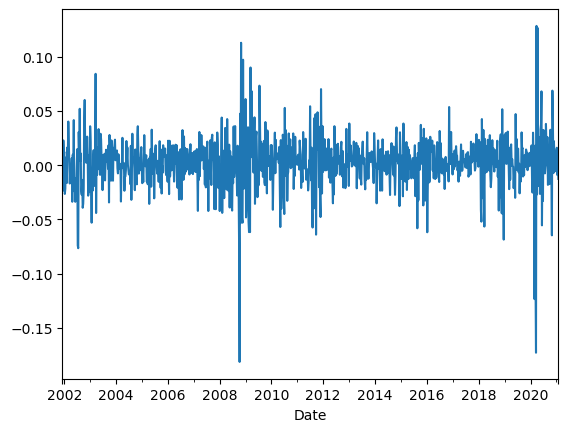

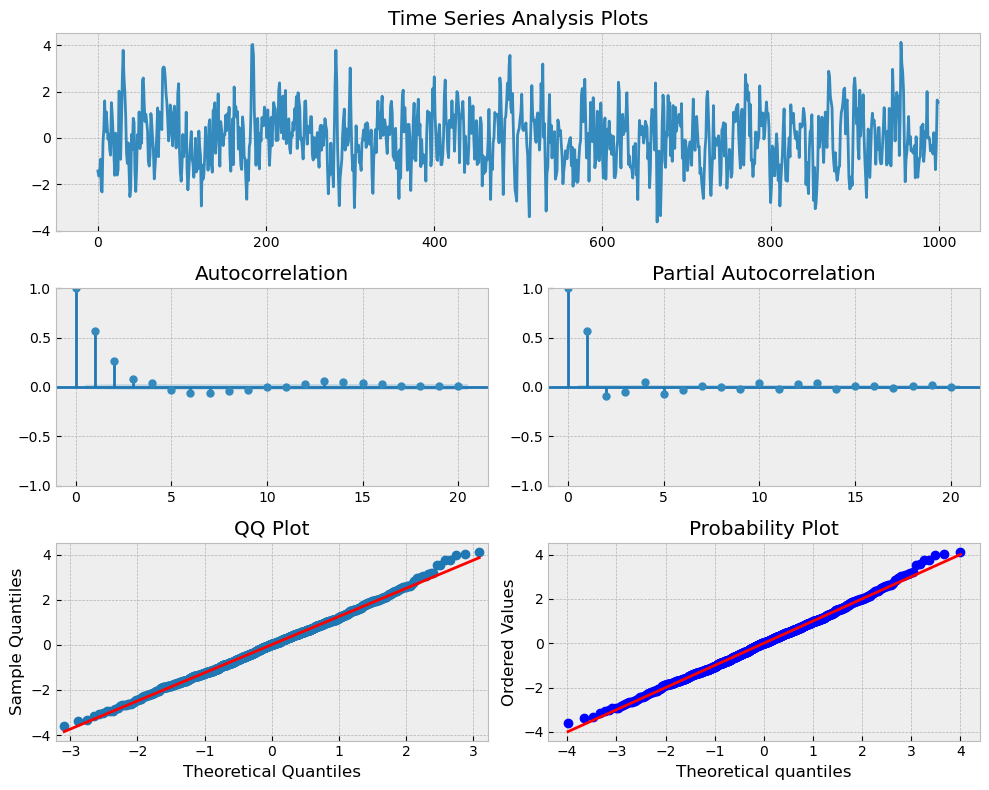

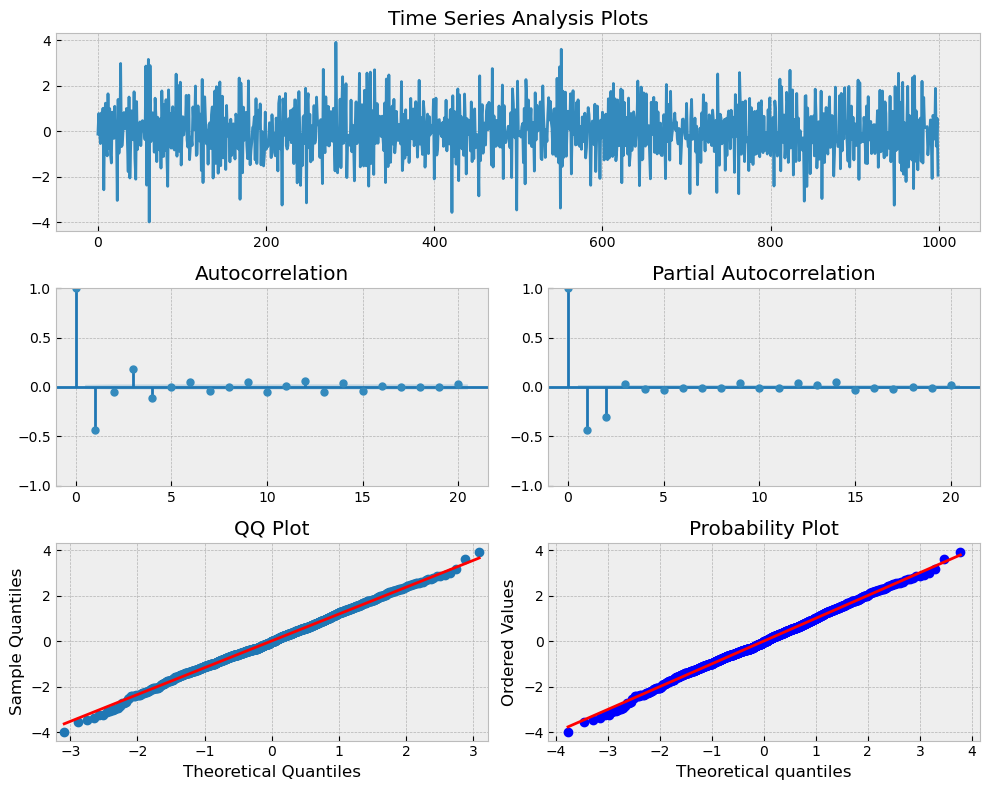

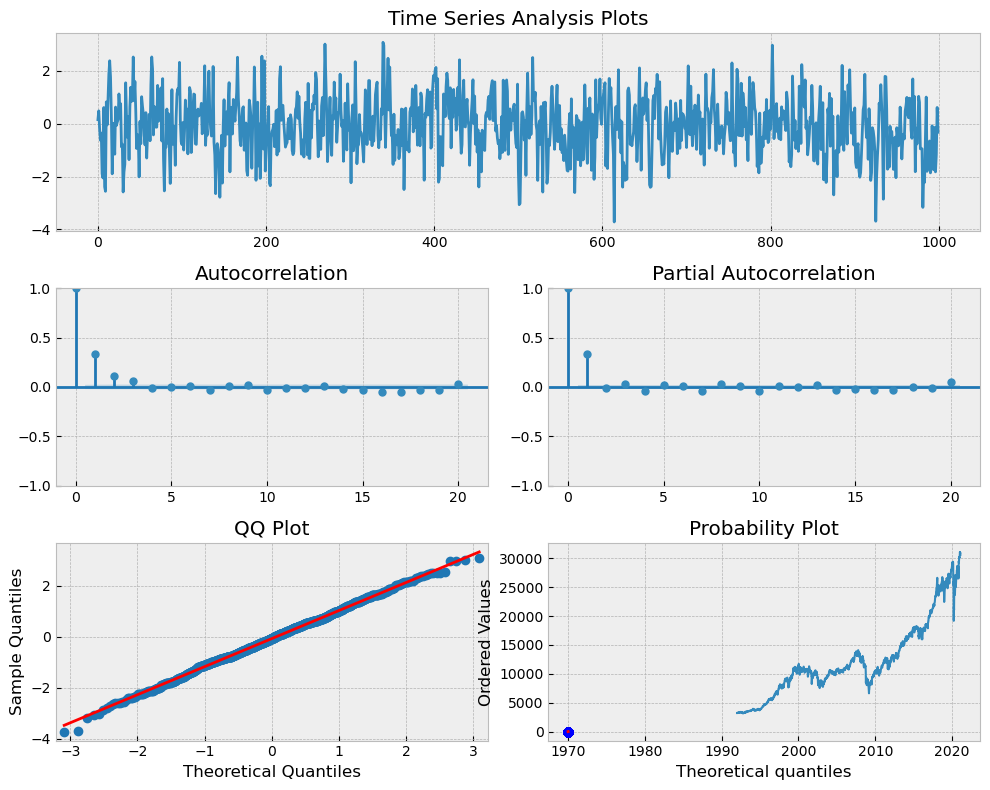

In [78]:
# importation des données
df = pd.read_csv("data/DJIA2.csv", parse_dates=['Date'], date_parser=dateparse, sep=";")
df.index = df["Date"]
df = df.drop(columns=["Date"]);

# passage en hebdomadaire
df2 = df.resample("W").last()
close = df2["Close"]

# graphique
plt.plot(close)
plt.show()

In [79]:
# calcul des rendements
rdt = (close / close.shift(1))-1

# mise en dataframe
rdt = rdt.iloc[1:]
rdt.columns = ["rdt"]

# graphique
plt.plot(rdt)

In [80]:
adf_stat, pvaleur, crit, regres = adfuller(rdt, regression="n", regresults=True) # maxlag
pvaleur # => série stationnaire

1.4969122595682347e-27

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b>Etape 1 - identification </b>
    
    
- L'objectif de cette étape est de trouver les valeurs des paramètres p et q correspondant respectivement a la partie AR et MA du processus ARMA. 
- On trouve ces valeurs a l'aide des valeurs des fonctions d'autocorrelation et d'autocorrélation partielle empiriques. Voir les fonctions décrites plus haut.

<br>
    
Si, par exemple, l'étude de ces fonctions nous amènes a trouver p = 1 et q = 2, notre ensemble de modèles de départ sera : 

- ARMA(1, 2), ARMA(1, 1)
- AR(1)
- MA(1), MA(2)

<br>
    
    
L'ensemble de ces modèles sont éligibles pour l'étape 2 d'estimation.


Pour définir le modèle en python, on utilise la classe <b><i>tsa.ARMA</i></b> du package Statsmodels (aka <i>sm</i>) :

    arma_mod = sm.tsa.ARMA(y, order=(p,q))
    
En n'oubliant pas de spécifier les valeurs des ordres p et q dans un tuple pour le keyword argument <i>order</i>.
    
    
</span>

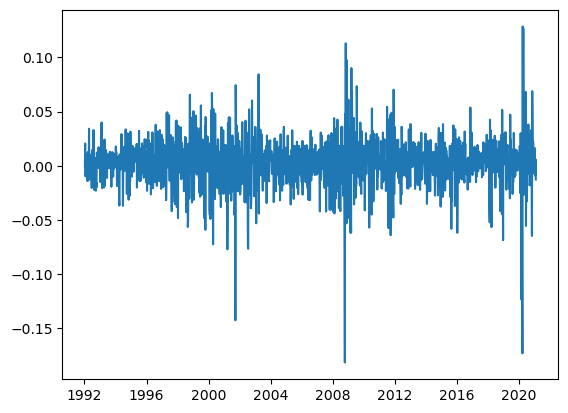

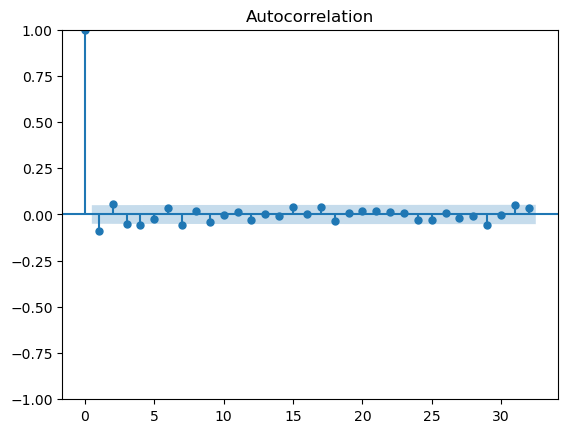

In [81]:
plot_acf(rdt,  alpha=.05)
plt.show()

In [82]:
coef_ac, confid_int = acf(rdt, nlags=10, alpha=.05) 

In [83]:
coef_ac

array([ 1.        , -0.09167183,  0.05500991, -0.05309518, -0.05904114,
       -0.0234294 ,  0.03572912, -0.05871152,  0.01681145, -0.03926918,
       -0.00301769])

In [84]:
confid_int

array([[ 1.        ,  1.        ],
       [-0.14199353, -0.04135013],
       [ 0.00426709,  0.10575274],
       [-0.1039888 , -0.00220156],
       [-0.11007483, -0.00800745],
       [-0.07463576,  0.02777697],
       [-0.01550438,  0.08696263],
       [-0.11000808, -0.00741496],
       [-0.034655  ,  0.06827789],
       [-0.09074953,  0.01221117],
       [-0.05457384,  0.04853845]])

In [85]:
for q, element in enumerate(coef_ac):
    if confid_int[q, 0] <= 0 <= confid_int[q, 1]:
        print(q-1)
        break

4


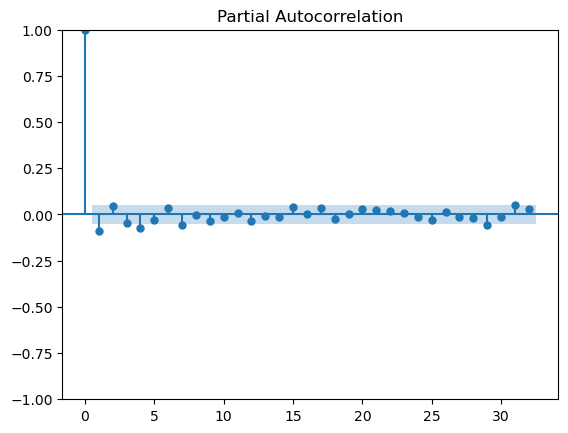

In [86]:
plot_pacf(rdt,  alpha=.05)
plt.show()

In [87]:
coef_pac, confid_int_pac = pacf(rdt, nlags=10, alpha=.05)

for p, element in enumerate(coef_pac):
    if confid_int_pac[p, 0] <= 0 <= confid_int_pac[p, 1]:
        print(p-1)
        break

1


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

Nous avons selectionné les retards $q=4$ et $p=1$ pour les parties __MA__ et __AR__ respectivement.
Les modèles identifiés lors de cette phase sont donc : 

- MA(1), MA(2), MA(3), MA(4)
- AR(1)
- ARMA(1, 1), ARMA(1, 2), ARMA(1, 3), ARMA(1, 4)
    
<br>   

<b>Etape 2 - estimation </b>
    
    
- Cette étape consiste a estimer les coefficients associés aux termes autorégréssifs et de moyenne mobile.
- Pour l'estimation, il est possible d'appliquer la méthode des MCO si les erreurs sont non autocorrélées, sinon la méthode du maximum de vraissemblance ou la méthode des moindre carrés non linéaires.

<br>
    
- Pour estimer un modèle identifié lors de l'étape 1, on utilise la méthode <i><b>.fit()</b></i> de la classe <i><b>tsa.ARMA</b></i> stockée dans la variable <i><b>arma_mod</b></i>:


    res = arma_mod.fit(trend='nc', start_params=[0]*(p+q), disp=-1)
    
- Nous stockons les résultats de l'estimation dans la variable <b><i>res</i></b>.    

- Nous allons stocker les résultats des estimations dans un dictionnaire "__result_dict__".   
    
</span>

In [88]:
from statsmodels.tsa.arima.model import ARIMA

In [89]:
df2["rdt"] = rdt
result_dict = {}
for p in [0,1]:
    for q in [0,1,2,3,4]:
        if (p != 0 or q != 0):
            arma_mod = ARIMA(endog=df2["rdt"].dropna(), order=(p,0, q))
            fitx = arma_mod.fit()
            result_dict["ARMA_%s%s" % (p, q)] = fitx

C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
result_dict

{'ARMA_01': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548e819490>,
 'ARMA_02': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548b8b4050>,
 'ARMA_03': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548c61d610>,
 'ARMA_04': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548ba7eb90>,
 'ARMA_10': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548c999090>,
 'ARMA_11': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548ca06f90>,
 'ARMA_12': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548b98b550>,
 'ARMA_13': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548c95e690>,
 'ARMA_14': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548c65a190>}

In [91]:
result_dict['ARMA_01'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    rdt   No. Observations:                 1517
Model:                 ARIMA(0, 0, 1)   Log Likelihood                3560.084
Date:                Fri, 22 Nov 2024   AIC                          -7114.167
Time:                        23:54:38   BIC                          -7098.194
Sample:                    01-12-1992   HQIC                         -7108.220
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.001      2.946      0.003       0.001       0.003
ma.L1         -0.0850      0.014     -6.085      0.000      -0.112      -0.058
sigma2         0.0005   9.01e-06     59.448      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4932.77
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b>Etape 3 - validation </b>
    
    
Nous avons à cette étape un certain nombre de modèles estimés.

Plusieurs éléments doivent ici être vérifiés : 

- Vérifier si tous les coefficients d'un modèle sont significatifs (tests habituels). Si ce n'est pas le cas, renouvelez l'estimation sans le/les coefficients non significatifs.

- Tester les bonnes propriétés des résidus:
    * Non autocorrélation 
    * homoscédasticité 
    
Il faut donc écarter les modèles à coeffs non significatifs ou ne respectant pas les bonnes propriétés résiduelles.

S'il deumeurent plusieurs modèles à cet instant, on peut utiliser plusieurs méthodes pour sélectionner le "meilleur".
* Les critères standards
* Les critères d'informations 

Les critères standards, que l'on cherche à minimiser :
* L'erreur absolue moyenne <i>(Mean Absolute Error ou "MAE")</i>:
$$MAE = \frac{1}{T}\sum_{t}|e_t|$$

* La racine de l'erreur quadratique moyenne <i>(Root Mean Squared Error ou "RMSE")</i> :
$$RMSE = \sqrt{\frac{1}{T}\sum_{t}e_t^2}$$

* L'erreur absolue moyenne en pourcentage <i>(Mean Absolute Percent Error ou "MAPE")</i> :
$$MAPE = 100\frac{1}{T}\sum_{t}|\frac{e_t}{Y_t}|$$

avec $T$, le nombre d'observation de la série étudiée et $e_t$ la série des résidus de l'estimation.

Les critères d'information, que l'on cherche à minimiser :
* Le critère d'information d'Akaike :
$$AIC=log \hat{\sigma}_{\epsilon}^2 + \frac{2(p+q)}{T}$$    

* Le critère d'information de Schwarz :
$$SIC=log \hat{\sigma}_{\epsilon}^2 + (p+q)\frac{log T}{T}$$   


    
    
</span>

In [92]:
pvs = result_dict['ARMA_01'].pvalues
pvs

const     3.214802e-03
ma.L1     1.162756e-09
sigma2    0.000000e+00
dtype: float64

In [93]:
def all_params_sign(pvs, seuil):
    for i, pv in enumerate(pvs):
        if pv > seuil:
            return False
    return True

In [94]:
all_params_sign(pvs, 0.05)

True

In [95]:
def which_is_unsign(pvs, seuil):
    res = []
    for i, pv in enumerate(pvs):
        if pv > seuil:
            res.append(pvs.index[i])
    return res

In [96]:
which_is_unsign(pvs, 0.001)

['const']

In [97]:
# probleme de significativité des coefficients
for k in result_dict.keys():
    pvs = result_dict[k].pvalues
    if not all_params_sign(pvs, 0.05):
        print(k, " => ", which_is_unsign(pvs, 0.05))

ARMA_12  =>  ['ar.L1', 'ma.L1', 'ma.L2']
ARMA_13  =>  ['ar.L1', 'ma.L1']
ARMA_14  =>  ['ar.L1', 'ma.L1']


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

On retire donc de la liste les modèles suivants:

- ARMA(1,2)
- ARMA(1,3)
- ARMA(1,4)
    
<br>
    
- Nous avons testé la significativité des coefficients. 
- Il nous reste donc à vérifier les bonnes propriétés des modèles restant (autocorrélation - Ljung-Box \& hétéroscédasticité - test ARCH)
    
- Puis nous devrons sélectionner le meilleurbon modèle. 
    
</span>

In [98]:
result_dict.pop('ARMA_12', None)
result_dict.pop('ARMA_13', None)
result_dict.pop('ARMA_14', None)

In [99]:
result_dict

{'ARMA_01': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548e819490>,
 'ARMA_02': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548b8b4050>,
 'ARMA_03': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548c61d610>,
 'ARMA_04': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548ba7eb90>,
 'ARMA_10': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548c999090>,
 'ARMA_11': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2548ca06f90>}

In [100]:
def mape(y_estim, y):
    T = len(y)
    pct = (y - y_estim) / y
    return 100*(1/T)*sum(pct)

In [101]:
for k in result_dict.keys():
    result = result_dict[k]
    # ddof
    ddof = len(result.params)
    residuals = result.resid
    acorr = acorr_ljungbox(residuals, model_df=ddof, lags=10, return_df=False) 
    het = het_arch(residuals, nlags=10, ddof=ddof)
    
    aic = result.aic
    bic = result.bic
    
    rmsex = rmse(result.fittedvalues, rdt)
    maex  = meanabs(result.fittedvalues, rdt)
    mapex = mape(result.fittedvalues, rdt)
    print("%s --- pval_ljung: %.4f      --- pval_arch: %.4f" %(k, acorr.iloc[-1,1], het[1]))
    print("        --- AIC:       %.4f   --- BIC:      %.4f" % (aic, bic))
    print("        --- RMSE:       %.6f    --- MAE:       %.6f      --- MAPE: %.6f" % (rmsex, maex, mapex))
    print("-------------------------------------------------------------------------------------------")

ARMA_01 --- pval_ljung: 0.0009      --- pval_arch: 0.0000
        --- AIC:       -7114.1672   --- BIC:      -7098.1937
        --- RMSE:       0.023151    --- MAE:       0.016125      --- MAPE: 108.257500
-------------------------------------------------------------------------------------------
ARMA_02 --- pval_ljung: 0.0019      --- pval_arch: 0.0000
        --- AIC:       -7115.6261   --- BIC:      -7094.3281
        --- RMSE:       0.023124    --- MAE:       0.016111      --- MAPE: 110.742118
-------------------------------------------------------------------------------------------
ARMA_03 --- pval_ljung: 0.0073      --- pval_arch: 0.0000
        --- AIC:       -7119.5734   --- BIC:      -7092.9510
        --- RMSE:       0.023079    --- MAE:       0.016107      --- MAPE: 107.861849
-------------------------------------------------------------------------------------------
ARMA_04 --- pval_ljung: 0.0867      --- pval_arch: 0.0000
        --- AIC:       -7125.4594   --- BIC:      -

In [102]:
rdt

Date
1992-01-12   -0.000625
1992-01-19    0.020472
1992-01-26   -0.009862
1992-02-02   -0.002908
1992-02-09    0.000620
                ...   
2021-01-03    0.013464
2021-01-10    0.016058
2021-01-17   -0.009123
2021-01-24    0.005930
2021-01-31   -0.012699
Freq: W-SUN, Name: Close, Length: 1517, dtype: float64

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

    
<br>
    
- Nous avons donc sélectionner le bon modèle (MA(4)) pour modéliser la dynamique de notre série...
- Ok, super ! À quoi bon ? Nous pouvons expliquer les valeurs en $t$ de la série à partir des valeurs en $t-1$, $t-2$, etc... quel intérêt ? 
- En théorie, si le modèle est performant, nous devrions pouvoir effectuer des prévisions ! 

<br>
    
<b> Etape 4 - prévision</b>
    
    

    
    
</span>

In [110]:
# dernière date : 2021-01-31  =>  prévision pour la première semaine de février :a
result_dict["ARMA_04"].forecast(steps=1, alpha=.05)

C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2021-02-07    0.002561
Freq: W-SUN, dtype: float64

In [112]:
resultat = result_dict["ARMA_04"]

In [113]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = rdt.iloc[-1000:].plot(ax=ax)
fig = plot_predict(resultat,"10-2020", "04-2021", dynamic=True, ax=ax,
                        plot_insample=False)

C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [114]:
resultat = result_dict["ARMA_04"]
fig, ax = plt.subplots()
ax = rdt.iloc[-20:].plot(ax=ax)
fig = plot_predict(resultat,"10-2020", "04-2021", dynamic=True, ax=ax,
                        plot_insample=False)

C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


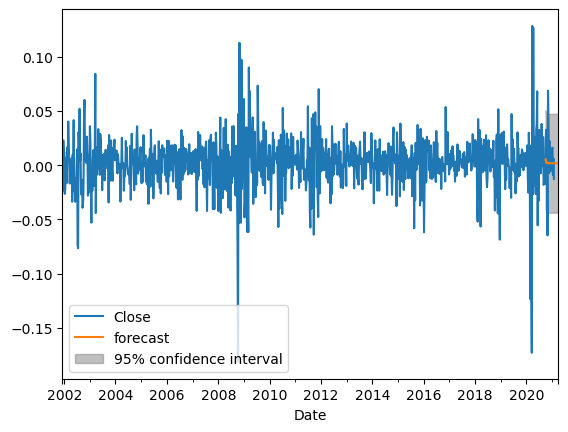

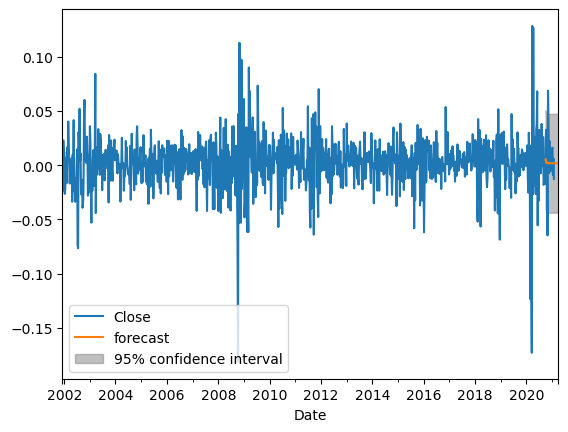

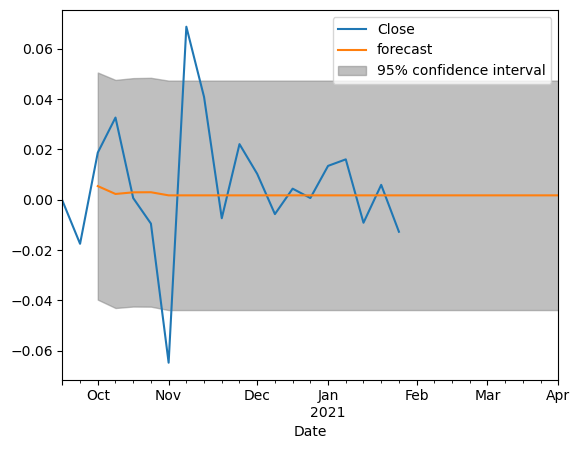

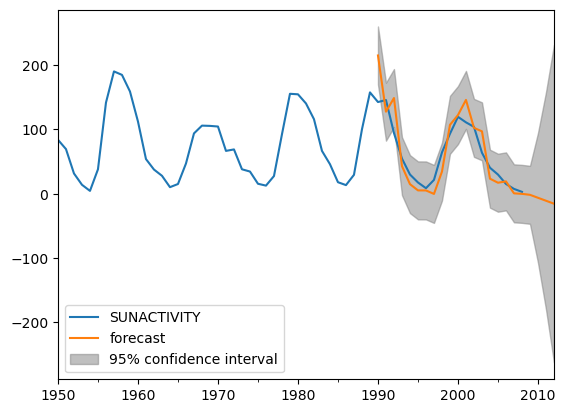

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

dta = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
dta.index = pd.date_range(start='1700', end='2009', freq='A')
res = ARIMA(dta, order=(0,2,0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
plot_predict(res, '1990', '2012', ax=ax)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">


# Modèles de la classe ARCH <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2'></a>
    
<br>
    
<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'> 

- Les modèles de types ARCHs ont été développés suite à des insuffisances des modèles linéaires. On distingue les processus à non linéarité en moyenne et les processus à non linéarité en variance.

- Ce document se concentre sur les processus non linéaire en variance : modèles de la classe ARCH.

<br>
    
- Jusqu'à présent, lorsque nous souhaitions modéliser des séries temporelles, nous utilisions des modèles ARMA (modèles linéaires).

<br>
    
- Deux inconvénients majeurs aux processus ARMA (Lardic, Mignon "Econométrie des séries temporelles macroéconomiques et financière" p.254):

    - "Les modèles ARMA ne permettent pas de prendre en compte les phénomènes d'asymétrie (caractérisant les cycles économiques, les coûts d'ajustements, les rigidités...), ni les ruptures de forte amplitude."

    - "Les modèles ARMA ne prennent en compte que les moments d'ordre 2 au travers de la fonction d'autocovariance, ce qui implique un exploitation incomplète de l'information contenue dans la série $X_t$. Les modèles non linéaires prennent en considération les moments d'ordre supérieur à 2 et permettent donc d'affiner l'étude de la dynamique de la série."

Ces deux limites sont à considérer comme des justifications des recours aux modèles non-linéaires (en variance).
    
<br>
    
- Le concept clé de cette classe de modèle est la __variance conditionelle__ : cad une variance conditionnée par le passé. 
- Dans les modèles __GARCH__ classiques, la variance conditionnelle est exprimée comme une fonction linéaire des carrés des valeurs passées de la série.
    
<br>
    
    
## Faits stylisés <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.0'></a>
    
    
- La modélisation à l'aide des modèles de la classe ARMA n'est pas suffisante pour l'étude des séries financières. 
    
- Les modèles ARMA peuvent être complètements caractérisés par leurs fonctions d'autocorrélations : seuls les deux premiers moments sont inclus. Si des régularités apparaissent lorsque l'on considère des moments d'ordre supérieurs, alors les modèles de la classe ARMA sont insuffisants.
 
- L'existence de régularités statistiques (faits stylisés), dans les séries financières notamment, rend difficile leurs modélisations.

- L'observation de ces régularités peut dépendre de la nature de la série et de sa fréquence. Les faits stylisés présentés ci-dessous sont valables pour la vaste majorité des séries de rendements boursiers en fréquence journalière.
    
    
- Pour illustrer ces faits stylisés, on utilise la série de cloture ajusté de l'indice S\&P 500 sur la période 02-01-1990 à 29-01-2021 en fréquence journalière.
    
    
</span>

In [4]:
df = pd.read_csv("data/sp500.csv", sep=";", parse_dates=['date'], date_parser=dateparse)
df.index = df["date"]
df = df.drop(columns=["date"]);
close = df["adj_close"]
rdt = ((close / close.shift(1)) - 1).iloc[1:]
df["rdt"] = rdt

C:\Users\pipsou\AppData\Local\Temp\ipykernel_10092\1085509661.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("data/sp500.csv", sep=";", parse_dates=['date'], date_parser=dateparse)


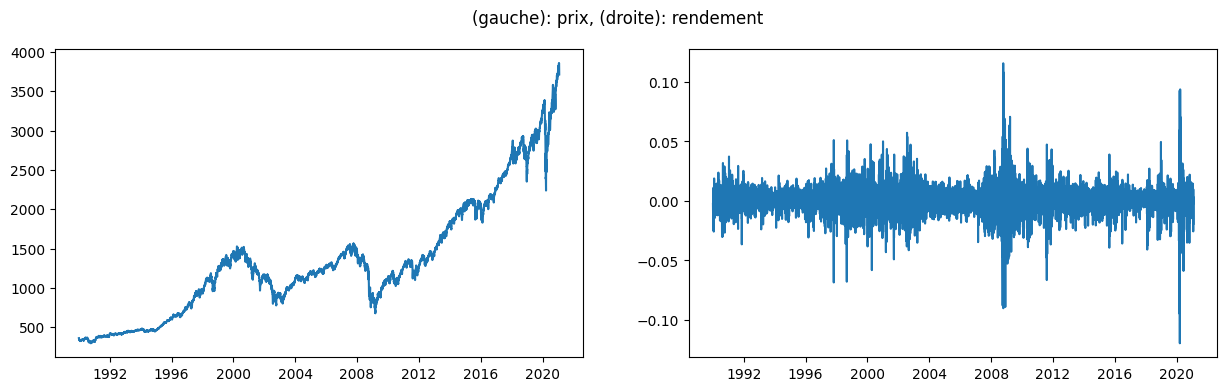

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
fig.suptitle('(gauche): prix, (droite): rendement')
ax1.plot(close.index.values, close.values)
ax2.plot(rdt.index.values, rdt.values)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

    
    

<b>1) Non stationnarité des séries de prix</b>

<br>    
    
- Les séries de prix sont généralement proche de marches aléatoires. 
- Les rendements, à l'inverse, sont la plupart du temps compatible avec les hypothèses de stationnarités au second ordre. 
- Sur une fenetre relativement longue, on peut considérer une magnitude constante.



    
</span>

In [6]:
adf_stat, pvaleur1, crit, regres = adfuller(close, regression="ct", regresults=True) # maxlag
adf_stat, pvaleur2, crit, regres = adfuller(rdt, regression="c", regresults=True) # maxlag

print(pvaleur1)
print(pvaleur2)

0.992508353595462
2.7552558748970997e-29


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

    
    

<b>2) Absence d'autocorrélation des rendements</b>

<br>    

- L'étude des fonctions d'autocorrélation des rendements montrent qu'elles décroissent très rapidement (rapidement non significativement différentes de zéro). 
- Si on se satisfait de cette observation, on dira que la série est proche d'un bruit blanc.
- Si on étudie les autocorrélations de séries à fréquence intra-journalière, on pourra observer, à l'inverse, des autocorélations significative (market microstructure effects)



    
</span>

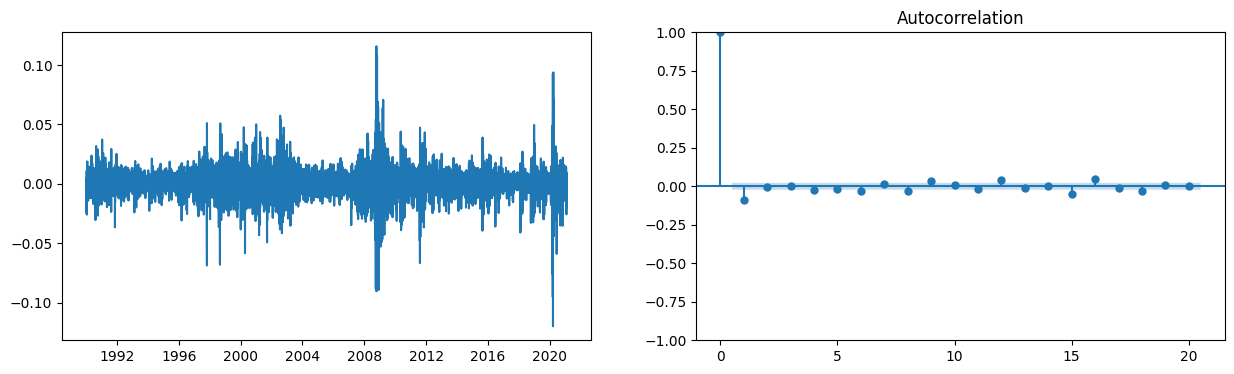

In [7]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(rdt)
sm.graphics.tsa.plot_acf(rdt, lags=20, ax=ax[1])
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

    
    

<b>3) Forte autocorrélation des rendements au carré</b>

<br>    

- Les rendements au carrés ou en terme absolus sont fortement autocorréllés. 
- Les rendements ne sont plus considérés comme une série de bruit blanc fort ($r_t$ et $r_{t+h}$ sont dépendants...)



    
</span>

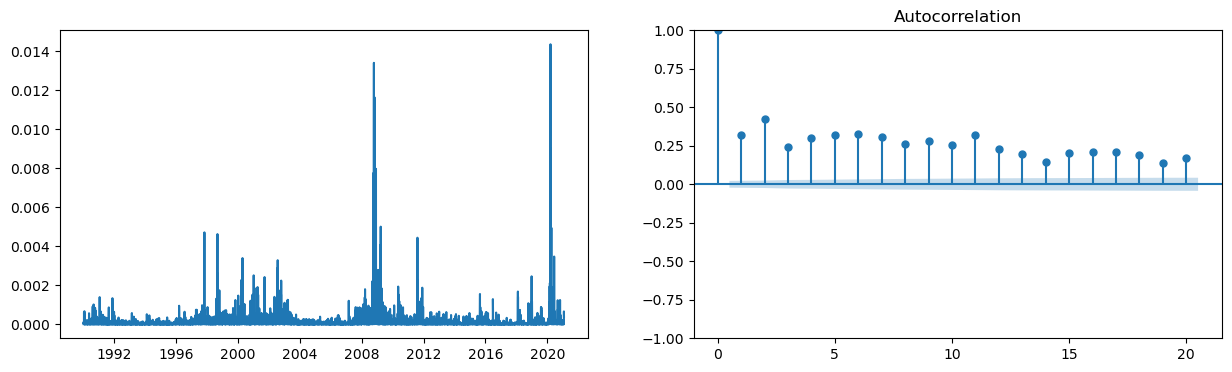

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(rdt**2)
sm.graphics.tsa.plot_acf(rdt**2, lags=20, ax=ax[1])
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

    
    

<b>4) Clusters de volatilité</b>

<br>    

- Des périodes de turbulences (haute volatilité) sont suivies de périodes de calme (faibles volatilité). 
- Ces périodes apparaissent souvent mais de façon non périodiques. 
- Les clusters de volatilité contredisent l'hypothèse d'homoscédasticité (localement : les tests de stationarités usuels ne captent que la variance sur longue période, c'est pour cela que l'on conclu le plus souvent à la stationnarité des rendements).



    
</span>

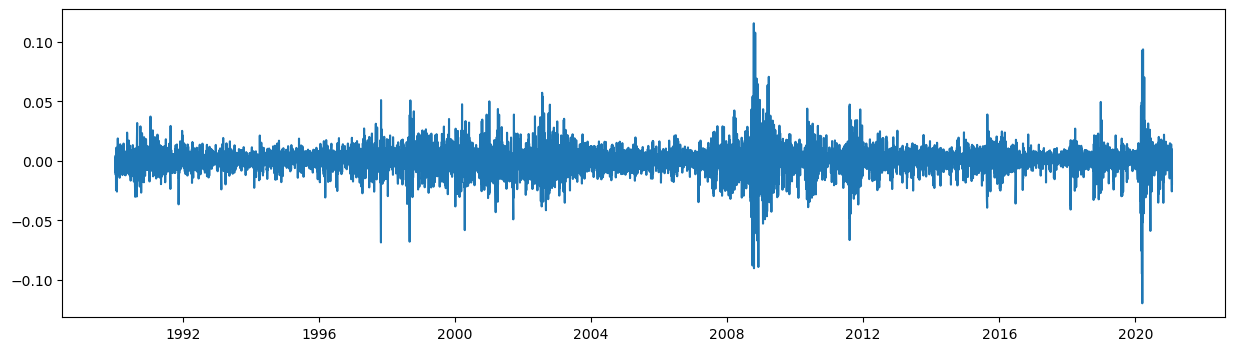

In [10]:
fig= plt.figure(figsize=(15,4))
plt.plot(rdt)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

    
    

<b>5) Distributions aux queues épaisses</b>

<br>    

- Si l'on trace la distribution empirique des rendements (ou la densité associée), on remarque qu'elle s'éloigne d'une distribution gaussienne (rejet H0 de Jarque-Berra par exemple). 
- Elles sont le plus souvent _leptokurtiques_ : retour vers zéro lent et présence d'une pic plus élevé à zéro (mesuré le plus souvent avec le kurtosis : $\frac{E[r^4]}{V[r]^2}$, avec des valeurs souvent supérieures à 3).
- Si on baisse la fréquence d'observation (intra -> daily -> weekly ...), cette distribution converge vers une distribution Gaussienne.



    
</span>

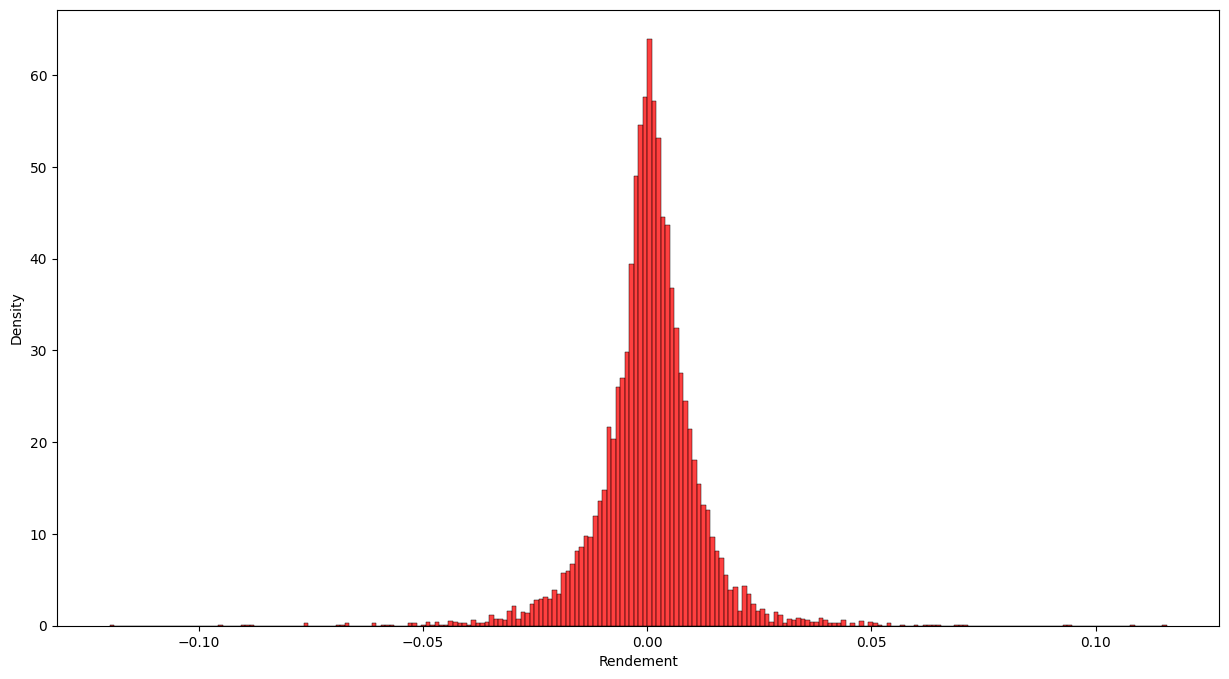

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(rdt.dropna().values, color='r', stat="density", common_norm=True,  ax=ax )
ax.set_xlabel('Rendement', fontsize=10)
plt.show()

In [28]:
sp.stats.jarque_bera(rdt)

SignificanceResult(statistic=40198.63496856883, pvalue=0.0)

In [29]:
from scipy.stats import norm, kurtosis, skew 

In [30]:
kurtosis(rdt)

11.09401635578462

In [31]:
skew(rdt)

-0.18507288955592688

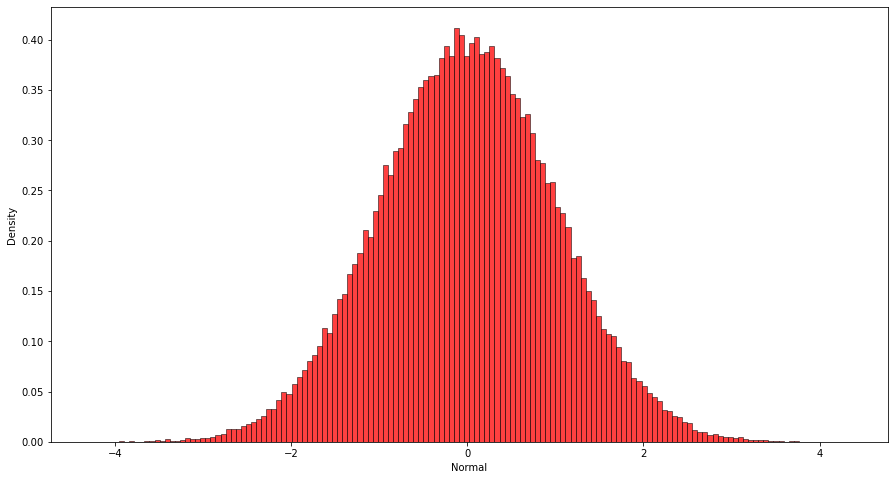

In [32]:
normal_data = norm.rvs(size=100000)

fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(normal_data, color='r', stat="density", common_norm=True, )
ax.set_xlabel('Normal', fontsize=10)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'> 

<b>6) Effets de levier </b>
    
<br>
    
- Un effet assymétrique est observé. 
- Une valeur passé négative ou positive du rendemment impacte différentement la volatilité comptemporaine:  
    - Les rendements négatifs (correspondant à des baisses de prix) ont tendance à accroître la volatilité dans une plus large mesure que les rendements positifs (hausses de prix) de même ampleur.

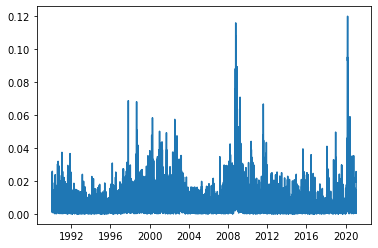

In [33]:
rdt_abs = abs(rdt)
df["rdt_abs"] = rdt_abs
plt.plot(rdt_abs)
plt.show()

In [34]:
df

,adj_close,rdt,rdt_abs
date,,,
1990-01-02,359.690002,NaN,NaN
1990-01-03,358.760010,-0.002586,0.002586
1990-01-04,355.670013,-0.008613,0.008613
1990-01-05,352.200012,-0.009756,0.009756
1990-01-08,353.790009,0.004514,0.004514
...,...,...,...
2021-01-25,3855.360107,0.003616,0.003616
2021-01-26,3849.620117,-0.001489,0.001489
2021-01-27,3750.770020,-0.025678,0.025678


In [35]:
acf(rdt, nlags=6)

array([ 1.00000000e+00, -8.89753528e-02, -6.25758422e-03,  7.39145756e-04,
       -2.51038353e-02, -2.03278234e-02, -3.31634678e-02])

In [36]:
acf(rdt_abs, nlags=6)

array([1.        , 0.28688411, 0.36664644, 0.31124139, 0.32254623,
       0.34075646, 0.32375718])

In [37]:
rdt_plus = list(map(lambda x: max(x, 0), df["rdt"]))
rdt_minus = list(map(lambda x: min(x, 0), df["rdt"]))
df["rdt_p"] = rdt_plus
df["rdt_m"] = rdt_minus

In [38]:
df.head()

,adj_close,rdt,rdt_abs,rdt_p,rdt_m
date,,,,,
1990-01-02,359.690002,NaN,NaN,NaN,NaN
1990-01-03,358.760010,-0.002586,0.002586,0.000000,-0.002586
1990-01-04,355.670013,-0.008613,0.008613,0.000000,-0.008613
1990-01-05,352.200012,-0.009756,0.009756,0.000000,-0.009756
1990-01-08,353.790009,0.004514,0.004514,0.004514,0.000000


In [39]:
for i in range(1,8,1):
    df["rdt_p_h%s" % i] = df["rdt_p"].shift(i)
    df["rdt_m_h%s" % i] = df["rdt_m"].shift(i)

In [40]:
df.head(10)

,adj_close,rdt,rdt_abs,rdt_p,rdt_m,rdt_p_h1,rdt_m_h1,rdt_p_h2,rdt_m_h2,rdt_p_h3,rdt_m_h3,rdt_p_h4,rdt_m_h4,rdt_p_h5,rdt_m_h5,rdt_p_h6,rdt_m_h6,rdt_p_h7,rdt_m_h7
date,,,,,,,,,,,,,,,,,,,
1990-01-02,359.690002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,358.760010,-0.002586,0.002586,0.000000,-0.002586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,355.670013,-0.008613,0.008613,0.000000,-0.008613,0.000000,-0.002586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,352.200012,-0.009756,0.009756,0.000000,-0.009756,0.000000,-0.008613,0.000000,-0.002586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,353.790009,0.004514,0.004514,0.004514,0.000000,0.000000,-0.009756,0.000000,-0.008613,0.000000,-0.002586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-09,349.619995,-0.011787,0.011787,0.000000,-0.011787,0.004514,0.000000,0.000000,-0.009756,0.000000,-0.008613,0.000000,-0.002586,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-10,347.309998,-0.006607,0.006607,0.000000,-0.006607,0.000000,-0.011787,0.004514,0.000000,0.000000,-0.009756,0.000000,-0.008613,0.000000,-0.002586,NaN,NaN,NaN,NaN
1990-01-11,348.529999,0.003513,0.003513,0.003513,0.000000,0.000000,-0.006607,0.000000,-0.011787,0.004514,0.000000,0.000000,-0.009756,0.000000,-0.008613,0.0,-0.002586,NaN,NaN
1990-01-12,339.929993,-0.024675,0.024675,0.000000,-0.024675,0.003513,0.000000,0.000000,-0.006607,0.000000,-0.011787,0.004514,0.000000,0.000000,-0.009756,0.0,-0.008613,0.0,-0.002586


In [41]:
df2 = df.dropna()

In [42]:
for i in range(1,7,1):
    r = np.corrcoef(df2["rdt_abs"], df2["rdt_p_h%s" % i])[0, 1]
    print(r)

0.07326561547271454
0.12638288612461263
0.1248248293761596
0.11956514801951647
0.1503502970304936
0.14351355975484453


In [43]:
for i in range(1,8,1):
    r = np.corrcoef(df2["rdt_abs"], df2["rdt_m_h%s" % i] * -1)[0, 1]
    print(r)

0.2685089467145847
0.31134237758015354
0.24729105456196468
0.2659153725959761
0.2574963709605009
0.24395828520094473
0.21860681420294523


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<table class="tg">
        <col width="100"  >
    <col width="80">
    <col width="80">
    <col width="80">
    <col width="80">
    <col width="80">
    <col width="80">
<thead>
  <tr>
    <th class="tg-0pky" style="text-align: left;">$h$</th>
    <th class="tg-0pky" style="text-align: center;">1</th>
    <th class="tg-0pky" style="text-align: center;">2</th>
    <th class="tg-0pky" style="text-align: center;">3</th>
    <th class="tg-0pky" style="text-align: center;">4</th>
    <th class="tg-0pky" style="text-align: center;">5</th>
    <th class="tg-0pky" style="text-align: center;">6</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" style="text-align: left;">$\hat{\rho}_{\epsilon} \left( h \right)$</td>
    <td class="tg-0pky" style="text-align: center;">-0.0889</td>
    <td class="tg-0pky" style="text-align: center;">-0.0626</td>
    <td class="tg-0pky" style="text-align: center;">0.0739</td>
    <td class="tg-0pky" style="text-align: center;">-0.0251</td>
    <td class="tg-0pky" style="text-align: center;">-0.0203</td>
    <td class="tg-0pky" style="text-align: center;">-0.0332</td>
  </tr>
  <tr>
    <td class="tg-0pky"  style="text-align: left;">$\hat{\rho}_{| \epsilon |} \left( h \right)$</td>
    <td class="tg-0pky" style="text-align: center;">0.2869</td>
    <td class="tg-0pky" style="text-align: center;">0.3666</td>
    <td class="tg-0pky" style="text-align: center;">0.3112</td>
    <td class="tg-0pky" style="text-align: center;">0.3225</td>
    <td class="tg-0pky" style="text-align: center;">0.3408</td>
    <td class="tg-0pky" style="text-align: center;">0.3238</td>
  </tr>
  <tr>
    <td class="tg-0pky"  style="text-align: left;">$\hat{\rho} \left( \epsilon^{+}_{t-h}, | \epsilon_t | \right)$</td>
    <td class="tg-0pky" style="text-align: center;">0.0733</td>
    <td class="tg-0pky" style="text-align: center;">0.1264</td>
    <td class="tg-0pky" style="text-align: center;">0.1248</td>
    <td class="tg-0pky" style="text-align: center;">0.1196</td>
    <td class="tg-0pky" style="text-align: center;">0.1504</td>
    <td class="tg-0pky" style="text-align: center;">0.1435</td>
  </tr>
  <tr>
    <td class="tg-0pky"  style="text-align: left;">$\hat{\rho} \left(- \epsilon^{-}_{t-h}, | \epsilon_t | \right)$</td>
    <td class="tg-0pky" style="text-align: center;">0.2685</td>
    <td class="tg-0pky" style="text-align: center;">0.3113</td>
    <td class="tg-0pky" style="text-align: center;">0.2473</td>
    <td class="tg-0pky" style="text-align: center;">0.2659</td>
    <td class="tg-0pky" style="text-align: center;">0.2575</td>
    <td class="tg-0pky" style="text-align: center;">0.2440</td>
  </tr>
</tbody>
</table>    

<br>
    

<b>7) Saisonnalité</b>

<br>    
    
- Déjà évoqué



    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">

    
<br>
    
    
## Modèles ARCH / GARCH <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.1'></a>

<br>
    
    
    
__Modèle ARCH__
    
    
<br>
    
Le processus ARCH(q) est donné par la troisième équation.

  \begin{cases}
        Y_t = \mu + \epsilon_t\\
    \epsilon_t = \sigma_t \eta_t\\
    \sigma^2_t = \alpha_0 + \sum^{i=1}_{q}\alpha_i\epsilon_{t-i}^{2} \\
  \end{cases}    
    
<br>
    
    
où $\mu$ est la moyenne du processus $Y_t$. $\mu$ peut prendre différentes formes : zéro, constante, ARX (variables retardées de $Y$ et/ou exogènes)...

$\epsilon$ représente l'erreur du modèle dont la variance est conditionné sur ses valeurs passés au carré. 

Prenons le cas simple où $\epsilon_t \sim N(0, \sigma^2_t)$. Ici la variance est indexé par $t$, la variance est donc dépendante du temps.
C'est cette dépendance que les processus présentés dans ce chapitre cherchent à modéliser. On peut réecrire $\epsilon_t = \sigma_t \eta_t$ avec $\eta_t \sim N(0, 1)$. La troisième équation modélise la variance $\sigma^2_t$. Où : $\alpha_0 > 0$ et $\alpha_i \geq 0 $ $\forall i$. Il faudra donc prendre $\sqrt{\sigma^2_t}$ pour obtenir $\sigma_t$.

La variance conditionelle (3ème ligne) peut se réécrire $\sigma^2_t = \alpha_0 + \alpha(L)\epsilon_t^2$

avec <br> $$\alpha \left(L \right) = \sum_{i=1}^q L^i \alpha_i $$
    
    
    
</span>

In [9]:
rdt_scale = rdt * 100
rdt_scale = rdt_scale.to_numpy()

In [11]:
from arch.univariate import ARX, ConstantMean
from arch.univariate import ARCH, GARCH
# composante moyenne
#ar = ARX(rdt_scale, lags=[1, 2, 3, 4, 5])
ar = ConstantMean(rdt_scale)
# composante variance
ar.volatility = ARCH(p=5)
res = ar.fit(update_freq=0, disp='off')
print(res.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -10527.9
Distribution:                  Normal   AIC:                           21069.9
Method:            Maximum Likelihood   BIC:                           21118.6
                                        No. Observations:                 7830
Date:                Fri, Nov 15 2024   Df Residuals:                     7829
Time:                        11:12:21   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0665  9.010e-03      7.384  1.534e-13 [4.

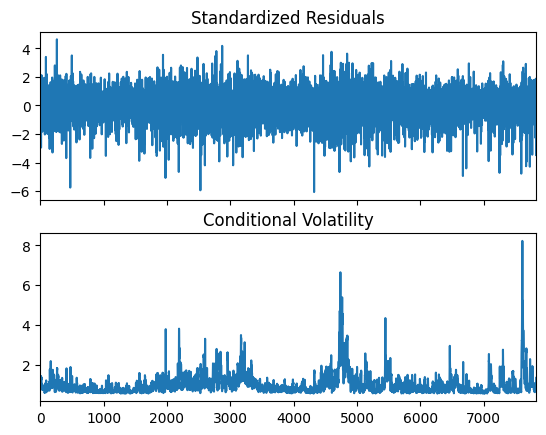

In [12]:
fig = res.plot()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

__Modèle GARCH__   
    
    
  \begin{cases}
        Y_t = \mu + \epsilon_t\\
    \epsilon_t = \sigma_t \eta_t\\
    \sigma^2_t = \alpha_0 + \sum_{i=1}^{q}\alpha_i\epsilon_{t-i}^{2} +  \sum_{j=1}^{p}\beta_j\sigma_{t-j}^{2}\\
  \end{cases}
    
<br>


où  <br>$\alpha_0 > 0$, <br>$\alpha_i \geq 0 $, <br>
$\beta_i \geq 0 $ $\forall i$

Le processus __GARCH(p, q)__ peut se réécrire : 
$$\sigma^2_t = \alpha_0 + \alpha(L)\epsilon_t^2 + \beta(L)\sigma^2_t$$ 

avec 
$$\alpha \left(L \right) = \sum_{i=1}^q L^i \alpha_i $$
$$\beta \left(L \right) = \sum_{i=1}^p L^i \beta_i $$

  
<br>
    

Une condition nécessaire et suffisante de stationnarité du processus GARCH(p, q) s'écrit (Bollerslev, 1986):

$$ \sum_{i=1}^{q}\alpha_i + \sum_{j=1}^{p}\beta_j < 1$$ 
    
    
    
<br>
    
    
Empiriquement, l'identification des ordres p et q d'un processus GARCH s'effectue à partir de l'étude des autocorrélations et autocorrélations partielles de la série $\epsilon_t^2$. Ainsi, pour un processus ARCH(q), la fonction d'autocorrélation partielle s'annule à partir du rang q+1. Pour un processus GARCH(p, q), cette fonction n'est en général pas nulle et décroit de facon exponentielle lorsque le nombre de retards augmente.

<br>
    
__Le modèle GARCH(1,1)__ est donné par : 
    
  \begin{cases}
        Y_t = \mu + \epsilon_t\\
    \epsilon_t = \sigma_t \eta_t\\
    \sigma^2_t = \omega + \alpha\epsilon_{t-1}^{2} +  \beta\sigma_{t-1}^{2}\\
  \end{cases}
    
</span>

In [13]:
from arch.univariate import ARX, ConstantMean
from arch.univariate import ARCH, GARCH
# composante moyenne
#ar = ARX(rdt_scale, lags=[1, 2, 3, 4, 5])
ar = ConstantMean(rdt_scale)
# composante variance
ar.volatility = GARCH(p=1, q=1)
res = ar.fit(update_freq=0, disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -10354.5
Distribution:                  Normal   AIC:                           20717.1
Method:            Maximum Likelihood   BIC:                           20744.9
                                        No. Observations:                 7830
Date:                Fri, Nov 15 2024   Df Residuals:                     7829
Time:                        11:12:28   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0626  8.879e-03      7.051  1.771e-12 [4.

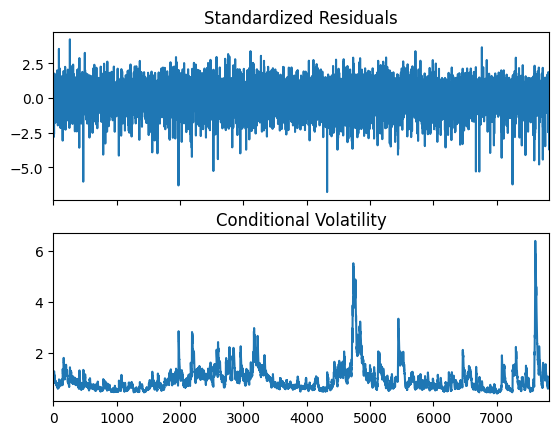

In [14]:
fig = res.plot()

In [15]:
forecast = res.forecast(horizon = 4, method='bootstrap', reindex=False)
forecast.variance

,h.1,h.2,h.3,h.4
7829,1.462871,1.4728,1.459762,1.438494


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


Pour les graphiques des prévisions ARCH :

blog :
https://medium.com/@corredaniel1500/forecasting-volatility-deep-dive-into-arch-garch-models-46cd1945872b

documentation package :
https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">

    
<br>
    
    
## Modèles alternatifs <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.2'></a>
    
    
Les modèles __ARCH__ et __GARCH__ reproduisent bien une caractéristique importante observée sur les séries financière : la succession de péride de calme et de crise. Ces modèles ont aussi l'avantage de permettre un étude étendue et simple des propriété statistiques et probabilistes des séries financière.
    
<br>
    

Cependant, certaines limites apparaissent :<br>
 - autocorrélations positives des carrés pour tout les lags (pourquoi pas négatives ?). Cette contrainte entraine également des difficultés pour l'inférence sur ces coefficients.
 - La formulation standart ARCH/GARCH ne permet pas d'inclure des mesures de volatilité provenant d'autres variables (variables macro par exemple).
 - par construction, la variance conditionnelle ne dépend que du carré des variables ($\epsilon$ et $\sigma$) passées : les innovations positives et négatives passées ont le même effet sur la volatilité actuelle
     - l'augmentation de la volatilité due à une baisse des prix est généralement plus forte que celle résultant d'une hausse des prix de même ampleur
    
    
    
<br>
    
- Modèle "classiques" alternatifs : EGARCH, TGARCH, GARCH-M, etc...
    
    
<br>
    
- Modèles "modèle-X" (ARMA-X, ARCH-X) : avec variables exogènes
    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">

    
<br>
    
    
## Tests <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.3'></a>

    
- Engle (1982) propose un test basé sur le multiplicateur de Lagrange pour la sélection du lag q dans un modèle ARCH(q). Il permet de détecter la présence ou non d'un potentiel effet arch dans les données.

Le test suit la procédure suivante :

- Estimer le modèle autorégressif le mieux adapté (le modèle en moyenne, le meilleur AR) : $y_t = \alpha_0 + \sum_{i=1}^{p} \alpha_{i} y_{t-i} + \epsilon_t$

- Extraire le vecteur des résidus au carré $\hat{\epsilon}^2$ et effectuer la regression suivante : 
$$ \epsilon_t^2 = b_0 + \sum_{i=1}^{q} b_i \hat{\epsilon}^2_{t-i}$$

- L'hypothèse nulle est l'absence d'effet ARCH (i.e. $b_i = 0 \quad\forall i = 1 ... q$). On se trouve sous l'hypothèse alternative lorsque au moins un des coefficients $b_i$ est significativement différent de $0$. Sous l'hypothèse nulle, la statistique de test $T°*R^2$ suit un une loi du Chi-Deux a $q$ degrés de liberté. Avec $T° = T - q$

- Conclusion du test: Si $T°R^2$ est supérieur à la valeur du tableau du Khi-deux, nous rejetons l'hypothèse nulle et concluons qu'il y a un effet ARCH dans le modèle ARMA. Si $T°R^2$ est inférieur à la valeur du tableau du Khi-deux, nous ne rejetons pas l'hypothèse nulle.    
    
    
    
    
</span>

In [49]:
het_arch(res.resid)

(2196.1791786606536, 0.0, 304.95216243530103, 0.0)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">

    
<br>
    
    
## Estimation <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.4'></a>
    
    
__Estimation par le maximum de vraissemblance__
    
    
Rappels : 
On appelle <i>vraissemblance (likelihood)</i> de l'échantillon ($X_1,...,X_n$) la loi de probabilité de ce n-uple, noté $L(x_1,...,x_n;\theta)$, et définie par : 

$$L(x_1,...,x_n;\theta) = \prod_{i=1}^{n}P(X_i=x_i|\theta)$$

si $X$ est une v.a. discrète, et par :

$$L(x_1, ...., x_n; \theta) = \prod_{i=1}^{n}f(x_i;\theta)$$

si $X$ est une v.a. continue de densité $f(x,\theta)$.


On appelle estimateur du maximum de vraissemblance (emv) toute fonction $\hat{\theta_n}$ de $(x_1, ..., x_n)$ qui vérifie :

$$L(x_1,...,x_n; \hat{\theta_n}) = max_{\theta \in \Theta} L (x_1, ..., x_n;\theta)$$ 

Sous les hypothèses de Cramer-Rao, la quantité d'information de Fischer peut s'écrire : 

$$I_n(\theta) = E\left(-\frac{\delta^2\ln L}{\delta \theta^2}\right)$$

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'> 

Considérons un modèle GARCH :
$$ Y_t = f(X_t;b) + \epsilon_t$$
$$\sigma_t^2 = h_t = \alpha_0 + \alpha_1\epsilon_{t-1}^2 + ... + \alpha_q\epsilon_{t-q}^2 + \beta_1\sigma^2_{t-1} + ... + \beta_p\sigma^2_{t-p}$$

On pose : 

$$Z^{'}_t = (1, \epsilon_{t-1}^2,...,\epsilon_{t-q}^2, h_{t-1}, ..., h_{t-p})$$
$$w^{'} = (\alpha_0, \alpha_1, ..., \alpha_q, \beta_1, ..., \beta_p)$$

On peut réecrire (2) :

$$h_t = Z^{'}_t w$$

La log vraisemblance, pour un échantillon de T observations, s'écrit : 
$$L_T(\theta) = \frac{1}{T}\sum_{t=1}^{T}l_t(\theta)$$

où 

$$l_t(\theta) = -\frac{1}{2}log h_t - \frac{1}{2} \frac{\epsilon_t^2}{h_t}$$

La maximisation de la log vraissemblance par rapport aux paramètres $\alpha, \beta$ et $b$ donne les conditions du premier ordre : 

$$\frac{\delta l_t}{\delta w} = \frac{1}{2h_t} \frac{\delta h_t}{\delta w} \left(\frac{\epsilon_t^2}{h_t}-1\right)$$
$$\frac{\delta l_t}{\delta b} = \frac{\epsilon_t X_t}{h_t} + \frac{1}{2}h_t \frac{\delta h_t}{\delta b} \left(\frac{\epsilon_t^2}{h_t}-1\right)$$

le hessien est donné par :
$$ \frac{\delta^2 l_t}{\delta w \delta w^{'}} = \left(\frac{\epsilon_t^2}{h_t}-1\right) \frac{\delta}{\delta w^{'}}\left[\frac{1}{2h_t}\frac{\delta h_t}{\delta w}\right] - \frac{1}{2h_t^2}\frac{\delta h_t}{\delta w}\frac{\delta h_t}{\delta w^{'}}\frac{\epsilon_t^2}{h_t} $$

$$\frac{\delta^2 l_t}{\delta b \delta b^{'}} = -\frac{X_t X_t^{'}}{h_t} - \frac{1}{2 h_t^2}\frac{\delta h_t}{\delta b}\frac{\delta h_t}{\delta b^{'}}\left(\frac{\epsilon_t^2}{h_t}\right) - \frac{2\epsilon_t X_t}{h_t^2}\frac{\delta h_t}{\delta b} + \left( \frac{\epsilon_t^2}{h_t}-1\right)\frac{\delta}{\delta b^{'}}\left[\frac{1}{2h_t}\frac{\delta h_t}{\delta b}\right]$$

où 

$$\frac{\delta h_t}{\delta w} = Z_t + \sum_{j=1}^{p}\beta_j \frac{\delta h_{t-j}}{\delta w}$$
$$\frac{\delta h_t}{\delta b} = -2 \sum_{i=1}^{q} \alpha_i X_{t-i}\epsilon_{t-i} + \sum_{j=1}^{p}\beta_j \frac{\delta h_{t-j}}{\delta b}$$

On obtient la matrice d'information de Fischer : 

$$I = \frac{1}{T}\sum_{t=1}^{T} E \left[\frac{X_tX_{t}^{'}}{h_t} + \frac{1}{2h_t^2} \frac{\delta h_t}{\delta b} \frac{h_t}{\delta b^{'}} \right]$$
    
    
    
<br>
    
    
__Estimation par Two step-OLS__ :

    
"Un modèle ARCH peut être vu comme deux modèles ARMA successifs, l'un sur le processus lui même, le second sur le carré de l'innovation"

Soit modèle avec des erreurs garchs :

$$Y_t = f(X_t; b) + \epsilon_t$$
$$V \left(\epsilon_t | \epsilon_{t-1}\right) = h_t = \alpha_0 + \alpha_1\epsilon_{t-1}^2 + ... + \alpha_q \epsilon_{t-q}^2$$

La première étape consiste à obtenir des estimateurs convergents des paramètres de l'équation de la moyenne et de l'équation de la variance.

Trouver $\hat{b}$ en régressant $Y_t$ sur $f\left(X_t; b\right)$. On en déduit les rédidus : $\epsilon_t = Y_t - X_t \hat{b}$.

On obtient les $\alpha_q$ en régressant $\hat{\epsilon}_t^2$ sur $1, \hat{\epsilon}_{t-1}^2, ..., \hat{\epsilon}_{t-q}^2$

Seconde étape, pour prise en compte de l'hétéroscédasticité.
En régressant $Y_t$ sur $f(X_t;b)$ par les moindres carrés quasi généralisés (MCQG) avec : 

$$\hat{h}_t = \hat{\sigma}_t^2 = \hat{\alpha}_0 + \hat{\alpha}_1 \hat{\epsilon}_{t-1}^2 + ... + \hat{\alpha}_q \hat{\epsilon}_{t-q}^2$$   
    
</span>